<a href="https://colab.research.google.com/github/BrMrtn/GoogleColab/blob/main/DeepLearning/KHF1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Python nyelven olvass be öt darab tetszőleges 256x256 pixeles színes képet, jelenítsd meg és jelenítsd meg külön az R, G és B csatornák értékeit hisztogramon. (4p)
2. Csatornánként számold ki a pixelek átlagát és szórását minden képre, majd alakítsd át ezeket 0 várható értékű, 1 szórású adathalmazzá. Ezt követően ellenőrizd a kapott adathalmaz várható értékét és szórását. (4p)
3. Olvass be két tetszőleges hangfájlt és jelenítsd meg ezek spektrogramját. (4p)
4. Alakítsd át a spektogramokat 0 várható értékű és 1 szorású adathalmazzá. Ezt követően ellenőrizd a kapott adathalmaz várható értékét és szórását. (4p)
5. Python scriptből töltsd le a http://smartlab.tmit.bme.hu/oktatas-deep-learning oldal szöveges tartalmát, jelenítsd meg a szöveges tartalmat, továbbá hisztogramon jelenítsd meg a tartalomban a betűk előfordulásának gyakoriságát. (4p)

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

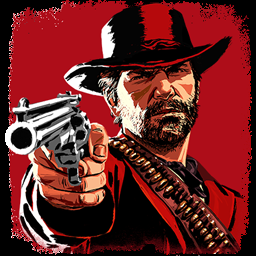

In [ ]:
img1 = cv2.imread('rdr2.png')
cv2_imshow(img1)